# Jyro Python Robot Simulator

## Pure-Python simulator for robots.

In [1]:
from jyro.simulator import (Pioneer, Simulator, Camera,
                            PioneerFrontSonars, Gripper,
                            PioneerFrontLightSensors, Color)
import math

In [2]:
sim = Simulator()

In [3]:
def world(sim):
    sim.addBox(0, 0, 10, 10, fill="white", wallcolor="grey") # meters
    sim.addBox(2, 2, 3, 3, "purple")
    ## brightness of 1 is radius 1 meter
    sim.addLight(7, 7, 4.25, color=Color(255, 255, 0, 64))

In [4]:
world(sim)

In [5]:
import random

class MyPioneer(Pioneer):
    def __init__(self, name, x, y, angle):
        Pioneer.__init__(self, name, x, y, angle)
        self.addDevice(PioneerFrontSonars(maxRange=4.0))
        self.addDevice(Gripper())
        self.addDevice(PioneerFrontLightSensors())
        
    def brain(self):
        self.move(random.random() * 2 - 1, 
                  random.random() * 2 - 1)

In [6]:
robot = MyPioneer("Pioneer", 5.00, 5.00, math.pi / 2) # meters, radians

In [7]:
sim.addRobot(robot)

In [8]:
from jyro.simulator.svgcanvas import SVGCanvas

canvas = SVGCanvas((250, 250))

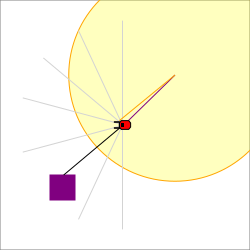

In [9]:
sim.draw(canvas)

In [10]:
sim["Pioneer"].getPose()

(5.0, 5.0, 1.5707963267948966)

In [11]:
sim["Pioneer"].move(1, 1)

In [12]:
from IPython.display import display, clear_output

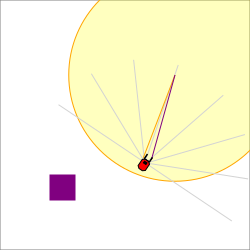

In [18]:
import time

for i in range(30):
    sim.step(run_brain=False)
    for r in sim.robots:
        sim.draw(canvas)
        clear_output(wait=True)
        display(canvas)
        time.sleep(.1)

In [19]:
%%time

import numpy

light0 = numpy.zeros((100,100))
light1 = numpy.zeros((100,100))

for i in range(500):
    sim.step(run_brain=False)
    for r in sim.robots:
        light0[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[0]        
        light1[int(r._gx/10 * 100), int(r._gy/10 * 100)] = r.device["light"].scan[1]

CPU times: user 464 ms, sys: 0 ns, total: 464 ms
Wall time: 468 ms


500 steps * 0.1 seconds/step = 50 seconds

50 seconds / XXX ms

In [20]:
50 / 0.442

113.12217194570135

Looks like it simulates about 80 - 100 simulated seconds for every real second, or is 80 - 100 times faster than real life.

## Checking Light Readings

New simulated light sensors are 75% direct light and 25% ambient light.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

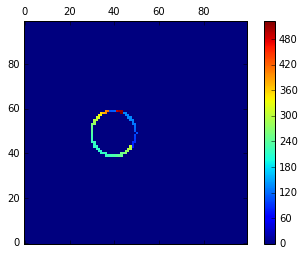

In [22]:
fig1 = plt.figure()
sp0 = fig1.add_subplot(111)
p0 = sp0.matshow(light0, origin="lower")
fig1.colorbar(p0)

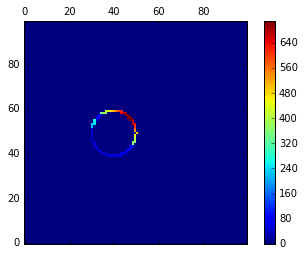

In [23]:
fig2 = plt.figure()
sp1 = fig2.add_subplot(111)
p1 = sp1.matshow(light1, origin="lower")
fig2.colorbar(p1)

## Differences between two light sensors

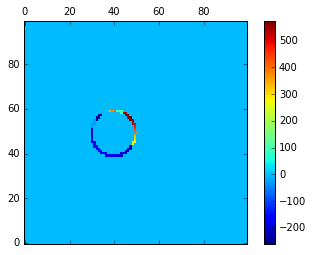

In [24]:
fig3 = plt.figure()
sp3 = fig3.add_subplot(111)
p3 = sp3.matshow(light1 - light0, origin="lower")
fig3.colorbar(p3)

In [25]:
def sampleLight(angle, resolution=50):
    light0 = numpy.zeros((resolution,resolution))
    light1 = numpy.zeros((resolution,resolution))

    for x in range(resolution):
        for y in range(resolution):
            for r in sim.robots:
                r.setPose(x/resolution * 10, 
                          y/resolution * 10, 
                          angle) 
                light0[x, y] = r.device["light"].scan[0]        
                light1[x, y] = r.device["light"].scan[1]
    fig = plt.figure()
    sp = fig.add_subplot(111)
    p = sp.matshow(light0, origin="lower")
    fig.colorbar(p)

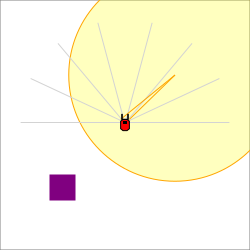

In [26]:
robot.setPose(5, 5, 0)
sim.draw(canvas)

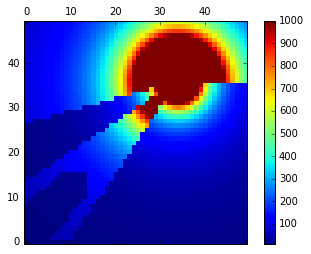

In [27]:
sampleLight(0) # face up, north

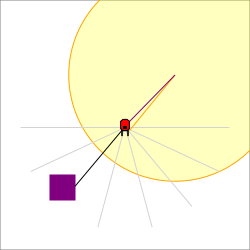

In [28]:
robot.setPose(5, 5, math.pi)
sim.draw(canvas)

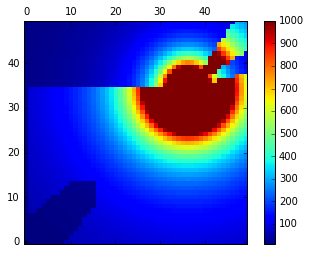

In [29]:
sampleLight(math.pi)

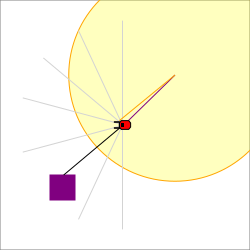

In [30]:
robot.setPose(5, 5, math.pi/2)
sim.draw(canvas)

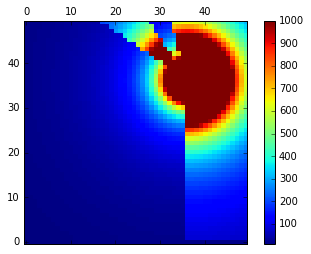

In [31]:
sampleLight(math.pi/2)

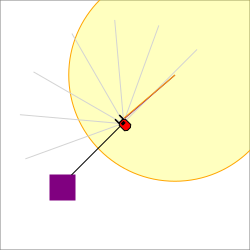

In [32]:
robot.setPose(5, 5, math.pi/4)
sim.draw(canvas)

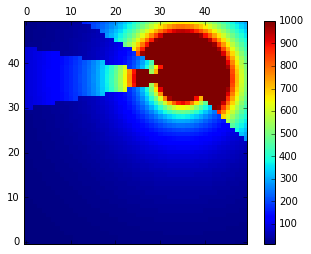

In [33]:
sampleLight(math.pi/4)

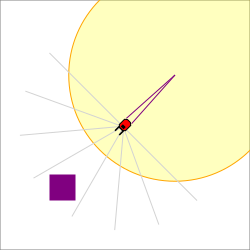

In [34]:
robot.setPose(5, 5, math.pi * 3/4)
sim.draw(canvas)

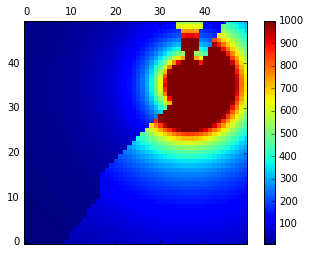

In [35]:
sampleLight(math.pi * 3/4)

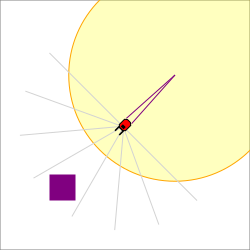

In [36]:
robot.setPose(5, 5, math.pi * 3/4)
sim.draw(canvas)

In [9]:
robot.addDevice(Camera(120, 80))

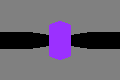

In [38]:
robot.device["camera"].getImage()

In [39]:
robot.move(0, .5)
for i in range(10):
    sim.step(run_brain=False)

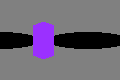

In [40]:
robot.device["camera"].getImage()

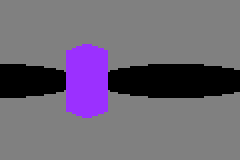

In [41]:
import PIL
img = robot.device["camera"].getImage()
img = img.resize((240, 160))
img

In [7]:
from jyro.simulator.vsimulator import VSimulator

In [8]:
vsim = VSimulator(robot, world)